In [27]:
import sys, os; sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from data.generator import *
from data import filters
from data import utils
%precision 4
%matplotlib inline
#%matplotlib notebook

## Covariance and correlation
 - describe the degree to which two random variables or sets of random variables tend to deviate from their expected values in similar ways
 - $\text{covariance} = \sigma_{XY} =E[ (X-\mu_X)\,(Y-\mu_Y)]$
 - $\text{correlation} = \rho_{XY}  =E[(X-\mu_X)\,(Y-\mu_Y)]/(\sigma_X \sigma_Y)$ i.e. normalized *covariance*

### Pearson product-moment correlation coefficient
 - measure of the linear correlation between two variables $X$ and $Y$
 - result is between $+1$ and $−1$ inclusive, where $+1$ is total positive correlation, $0$ is no correlation, and $−1$ is total negative correlation

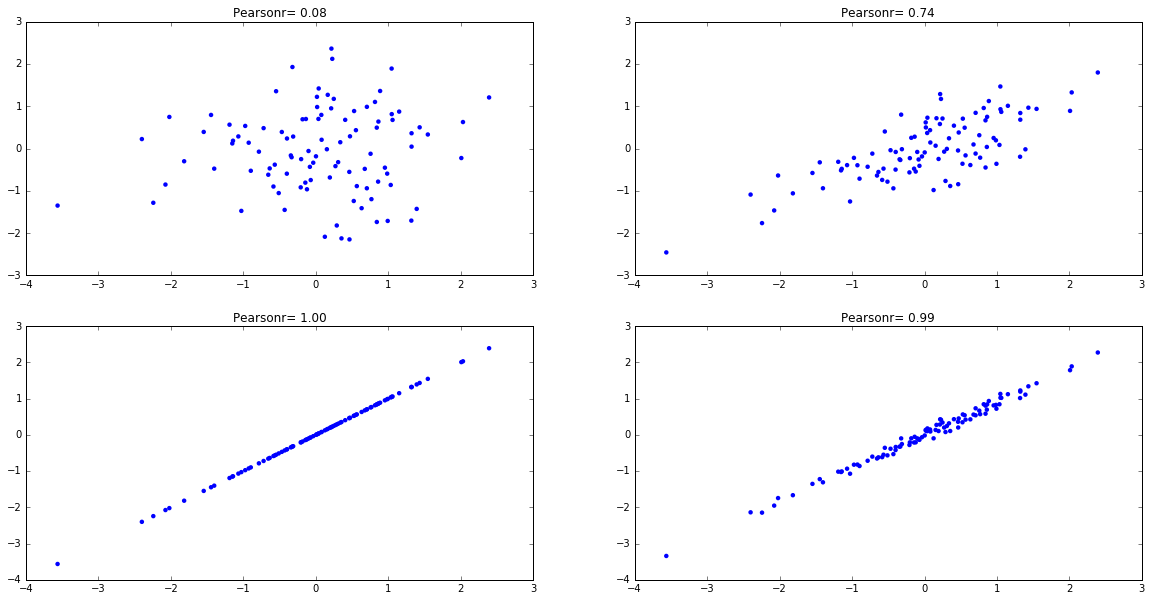

In [49]:
from scipy.stats.stats import pearsonr

plt.figure(figsize=(20,10))
size = 100

def experiment(c, cov_method, title):
    np.random.seed(1234)
    x = np.random.randn(size)
    y = x*(-abs(c)+1) + np.random.randn(size)*c
    plt.scatter(x, y, edgecolor='none')
    plt.title('%s= %1.2f' % (title, cov_method(x, y)[0]))



coef = [1.0, 0.5, 0.0, 0.1]
for c in coef:
    plt.subplot(2, 2, coef.index(c)+1)
    experiment(c, pearsonr, 'Pearsonr')


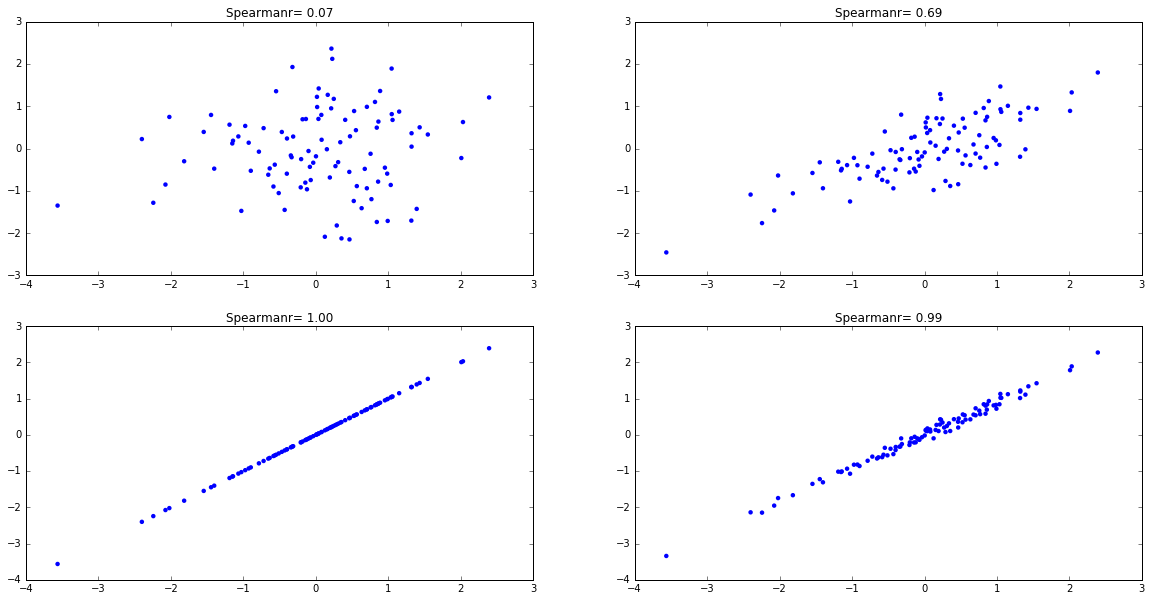

In [48]:
from scipy.stats.stats import spearmanr

plt.figure(figsize=(20,10))
size = 100

coef = [1.0, 0.5, 0.0, 0.1]
for c in coef:
    plt.subplot(2, 2, coef.index(c)+1)
    experiment(c, spearmanr, 'Spearmanr')


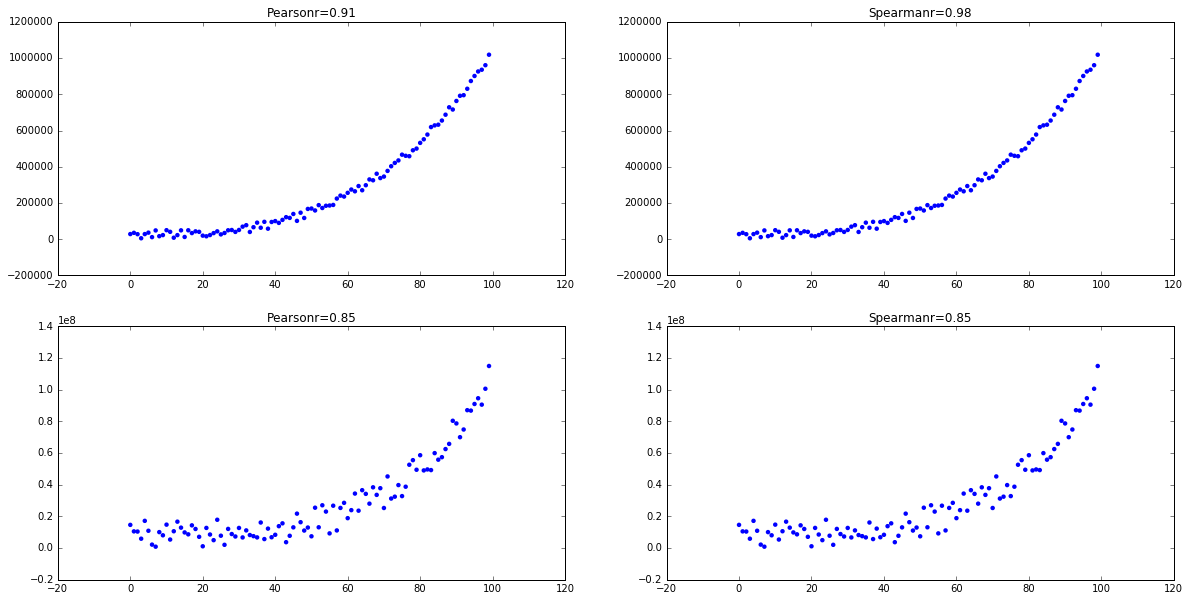

In [86]:
from scipy.stats.stats import spearmanr
from scipy.stats.stats import pearsonr
size = 100


def experiment(x, y, cov_method, title):
    plt.scatter(x, y, edgecolor='none')
    cov = cov_method(x, y)[0]
    plt.title('%s=%1.2f' % (title, cov))
    #plt.plot([0, size], [0, max(y)], c='red')

plt.figure(figsize=(20,10))


x = np.array(list(range(size)))
y = x**3 + np.random.random(size)*(size**3)/20

plt.subplot(2, 2, 1)
experiment(x, y, pearsonr, 'Pearsonr')
plt.subplot(2, 2, 2)
experiment(x, y, spearmanr, 'Spearmanr')

x = np.array(list(range(size)))
y = x**4 + np.random.random(size)*(size**4)/5

plt.subplot(2, 2, 3)
experiment(x, y, pearsonr, 'Pearsonr')
plt.subplot(2, 2, 4)
experiment(x, y, spearmanr, 'Spearmanr')